In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./raw_data/병용금기 성분리스트_241011.csv', encoding = 'cp949')
df.head()

,연번,유효성분 '1',유효성분 '2',허가사항,비고
0,1,acemetacin,diflunisal,중증의 위장관계 이상반응,NaN
1,2,acemetacin,methotrexate(분류번호 : 421),신세뇨관에서 Methotrexate 배설이 지연되어 Methotrexate의 혈액학...,methotrexate 1주에 15mg 이상 투여시
2,3,acetazolamide,methazolamide,신장결석 형성 위험 증가,NaN
3,4,acetazolamide,topiramate,신결석,NaN
4,5,acitretin,doxycycline,두개내압 증가,NaN


In [4]:
# 성분명 리스트 읽어오기
with open('./data/항우울제 성분명(영어).txt','r') as f:
    ingredient_name_cap = f.read().splitlines()

ingredient_name =[]
for item in ingredient_name_cap:
    item = item.lower()
    ingredient_name.append(item)

ingredient_name

['citalopram',
 'escitalopram',
 'fluoxetine',
 'fluvoxamine',
 'paroxetine',
 'sertraline',
 'vilazodone',
 'bupropion',
 'mirtazapine',
 'trazodone',
 'desvenlafaxine',
 'duloxetine',
 'levomilnacipran',
 'venlafaxine',
 'amitriptyline',
 'amoxapine',
 'clomipramine',
 'desipramine',
 'doxepin',
 'imipramine',
 'maprotiline',
 'nortriptyline',
 'protriptyline',
 'trimipramine',
 'isocarboxazid',
 'phenelzine',
 'selegiline',
 'tranylcypromine',
 'dextroamphetamine',
 'methylphenidate',
 'agomelatine',
 'ketamine',
 'esketamine']

In [17]:
rows =[]
for chunk in pd.read_csv('./raw_data/병용금기 성분리스트_241011.csv',encoding='cp949',chunksize=100000):
    rows.append(chunk[(chunk["유효성분 '1'"].isin(ingredient_name)) & (chunk["유효성분 '2'"].isin(ingredient_name))])

df = pd.concat(rows)

In [18]:
df

,연번,유효성분 '1',유효성분 '2',허가사항,비고
52,53,amitriptyline,selegiline,"이상고열, 전신경련, 발한, 불온, 혼수등",NaN
53,54,amoxapine,selegiline,"세로토닌성 증후군(고혈압, 고열, 간대성 근경련, 정신상태 변화 등)",NaN
140,141,clomipramine,selegiline,"고혈압위기, 이상고열증, 근간대경련, 격월성 발작, 정신착란, 혼수 등",NaN
179,180,doxepin,selegiline,"근독성, 간질, 세로토닌성 증후군(고혈압, 고열, 간대성 근경련, 정신상태 변화 등)",NaN
222,224,fluvoxamine,selegiline,"세로토닌성 증후군(고혈압, 고열, 간대성 근경련, 정신상태 변화 등)",NaN
239,241,imipramine,selegiline,"근독성, 간질, 세로토닌성 증후군(고혈압, 고열, 간대성 근경련, 정신상태 변화 등)",NaN
402,404,methylphenidate,selegiline,고혈압성 위기(현저한 혈압상승),NaN
424,428,mirtazapine,selegiline,"구역, 구토, 안면홍조, 어지러움, 진전, 산동, 강직, 발한, 고온증, 심장지표의...",NaN
451,455,nortriptyline,selegiline,"근독성, 간질, 세로토닌성 증후군(고혈압, 고열, 간대성 근경련, 정신상태 변화 등)",NaN
458,462,paroxetine,selegiline,"세로토닌성 증후군(고혈압, 고열, 간대성 근경련, 정신상태 변화 등)",NaN


In [19]:
df.shape

(18, 5)

In [ ]:
import os

output_file_path = './data/anti_depressant_incompatibility.csv'
df.to_csv(output_file_path, index=False, encoding='cp949')

In [20]:
# 인접리스트를 생성한다.
selected_columns = df[["유효성분 '1'", "유효성분 '2'"]]

adj_list = {}
for ingredient1, ingredient2 in selected_columns.groupby("유효성분 '1'")["유효성분 '2'"]:
    adj_list[ingredient1] = list(ingredient2)

adj_list

{'agomelatine': ['fluvoxamine'],
 'amitriptyline': ['selegiline'],
 'amoxapine': ['selegiline'],
 'clomipramine': ['selegiline'],
 'desvenlafaxine': ['selegiline'],
 'doxepin': ['selegiline'],
 'duloxetine': ['fluvoxamine', 'selegiline'],
 'fluvoxamine': ['selegiline'],
 'imipramine': ['selegiline'],
 'methylphenidate': ['selegiline'],
 'mirtazapine': ['selegiline'],
 'nortriptyline': ['selegiline'],
 'paroxetine': ['selegiline'],
 'selegiline': ['bupropion', 'fluoxetine', 'sertraline', 'venlafaxine']}

In [21]:
# 모든 고유한 노드 식별
nodes = sorted(set(adj_list.keys()).union(*adj_list.values()))

# 빈 인접 행렬 초기화
adj_matrix = pd.DataFrame(0, index=nodes, columns=nodes)

# 인접 행렬 채우기
for source, targets in adj_list.items():
    for target in targets:
        adj_matrix.loc[source, target] = 1

# 결과 출력
adj_matrix

,agomelatine,amitriptyline,amoxapine,bupropion,clomipramine,desvenlafaxine,doxepin,duloxetine,fluoxetine,fluvoxamine,imipramine,methylphenidate,mirtazapine,nortriptyline,paroxetine,selegiline,sertraline,venlafaxine
agomelatine,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
amitriptyline,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
amoxapine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
bupropion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
clomipramine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
desvenlafaxine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
doxepin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
duloxetine,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
fluoxetine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fluvoxamine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
import networkx as nx

In [23]:
# adjacency matrix를 networkx 그래프로 변환합니다.
G = nx.from_pandas_adjacency(adj_matrix)

Text(0.5, 1.0, 'incompatible antidepressant ingredient Network')

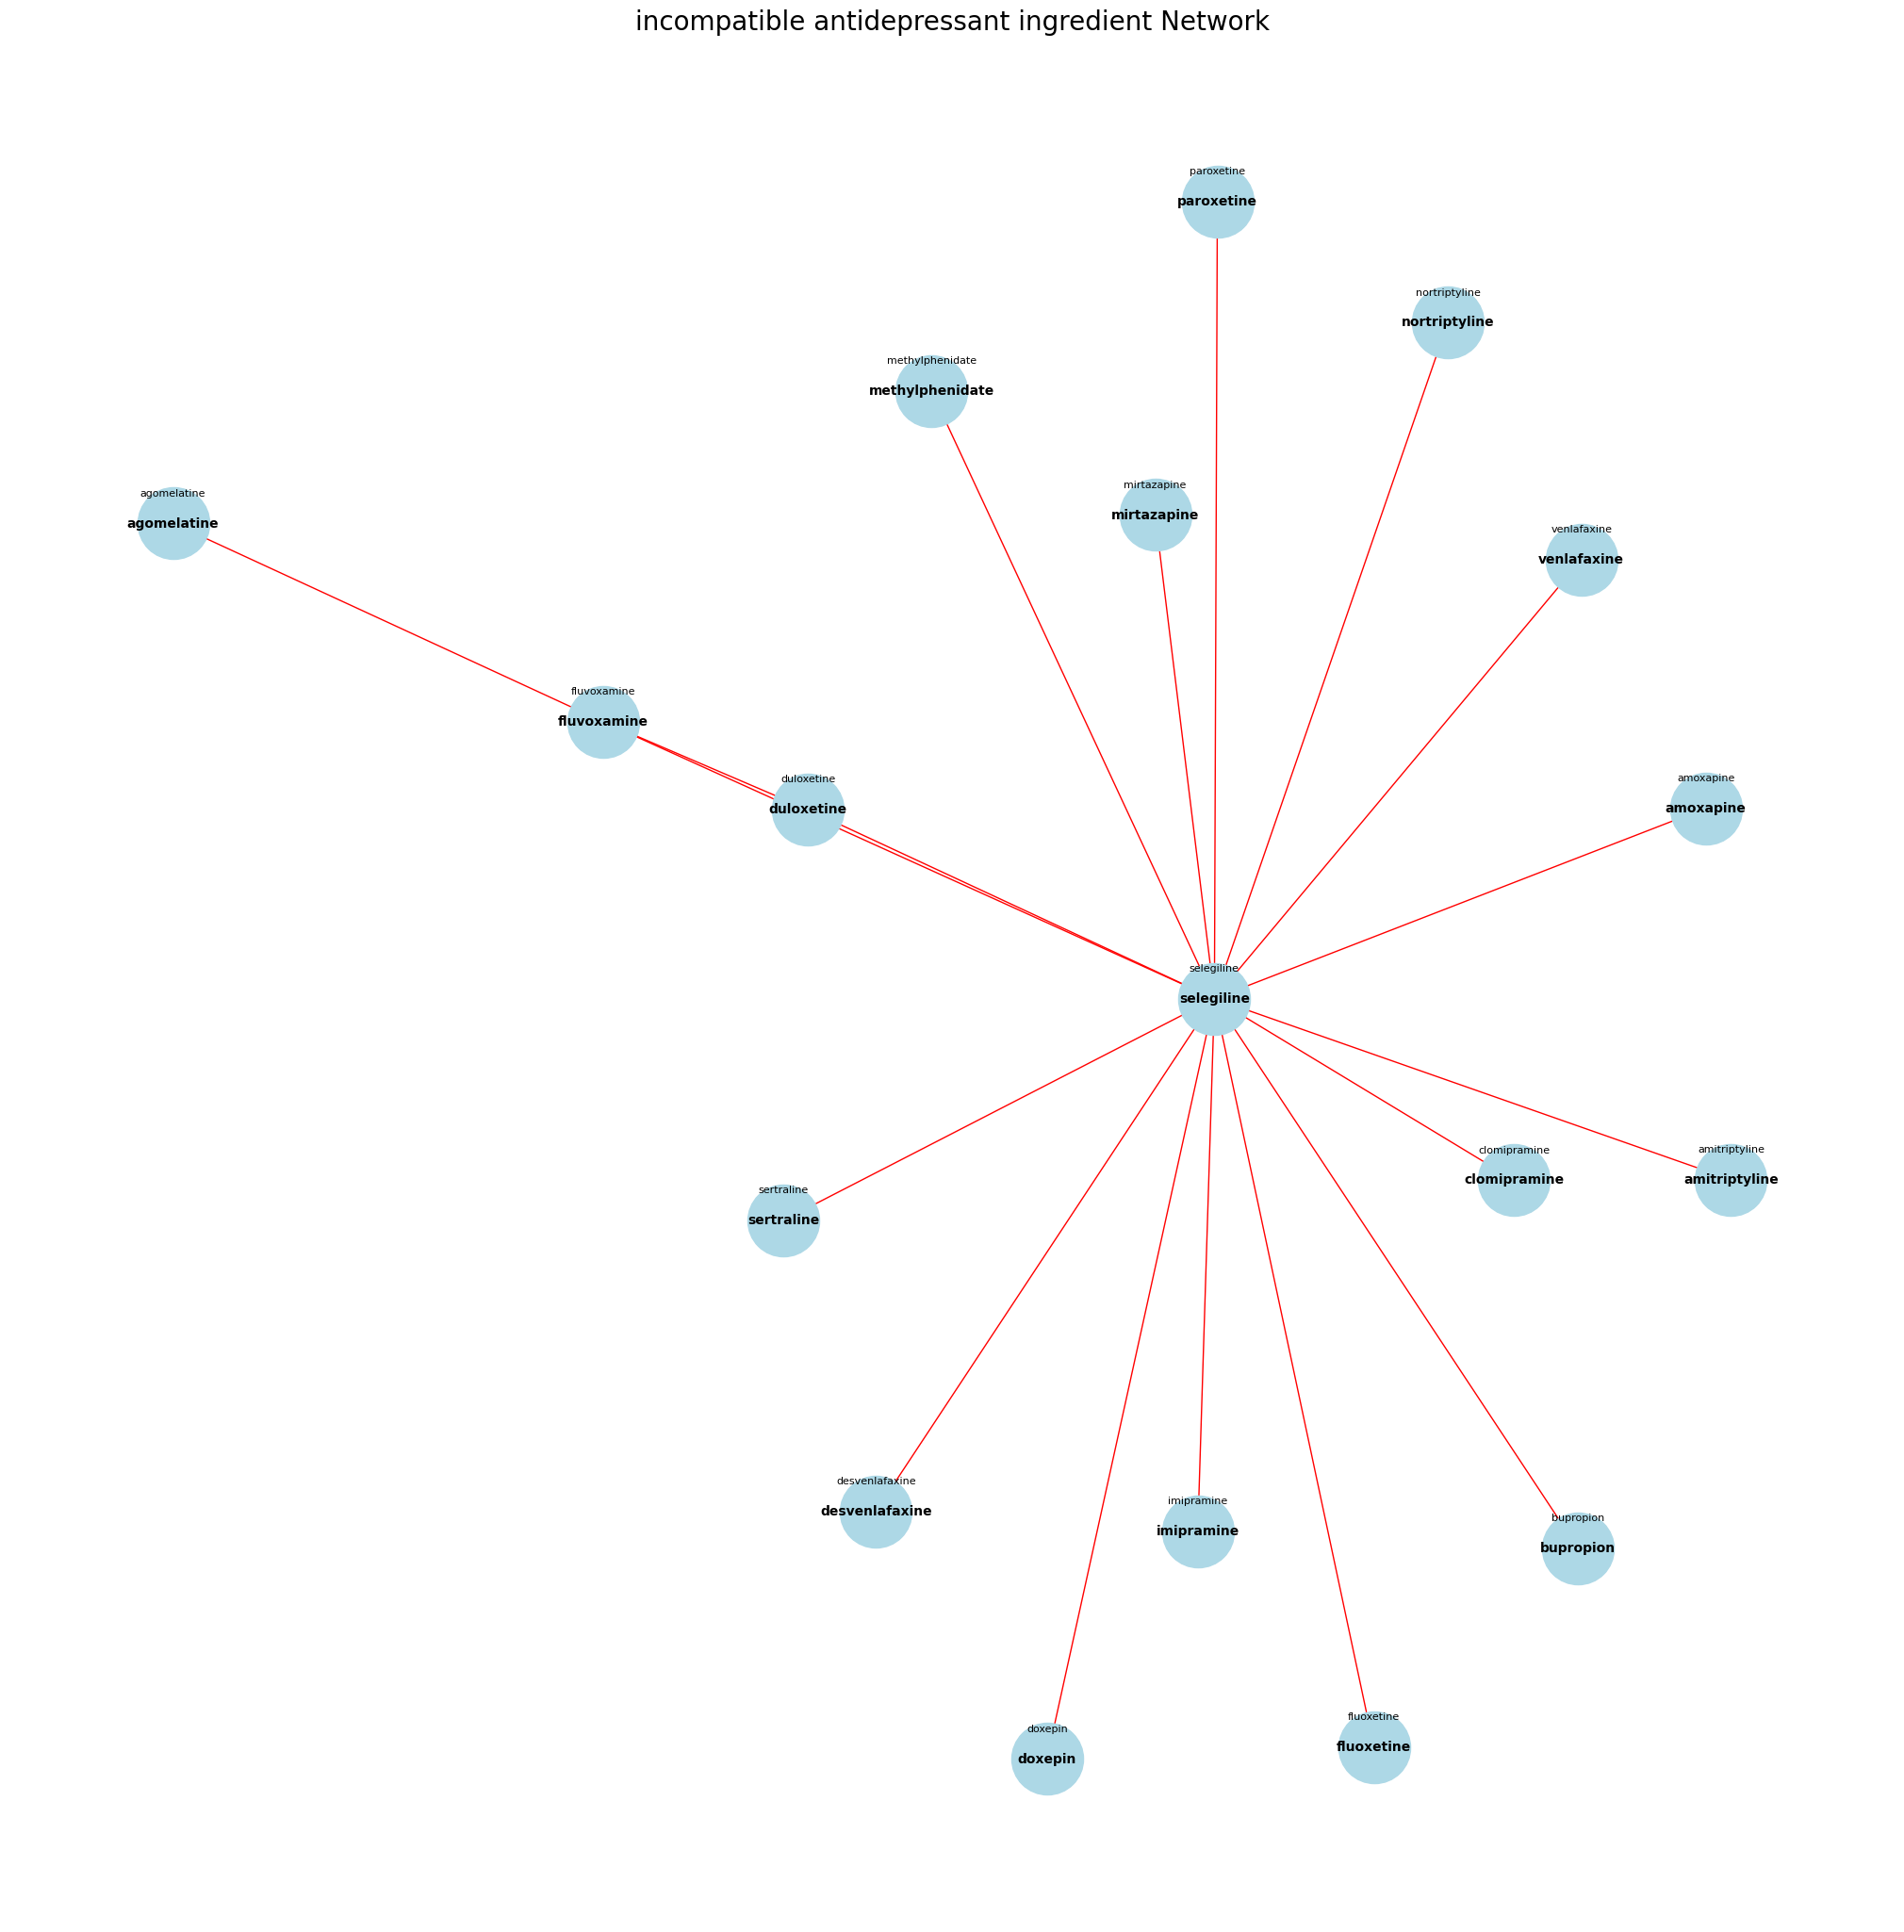

In [24]:
# 그래프 레이아웃 설정 (여기서는 spring layout 사용)  # spring(용수철) layout
pos = nx.spring_layout(G, k=0.5, iterations=50)

# 그래프 그리기
plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=3000, font_size=10, font_weight='bold',
        edge_color='red', width=1, arrows=True)

# 노드 레이블 위치 조정
label_pos = {k: [v[0], v[1]+0.02] for k, v in pos.items()}
nx.draw_networkx_labels(G, label_pos, font_size=8)

# 그래프 제목 설정
plt.title("incompatible antidepressant ingredient Network", fontsize=20)

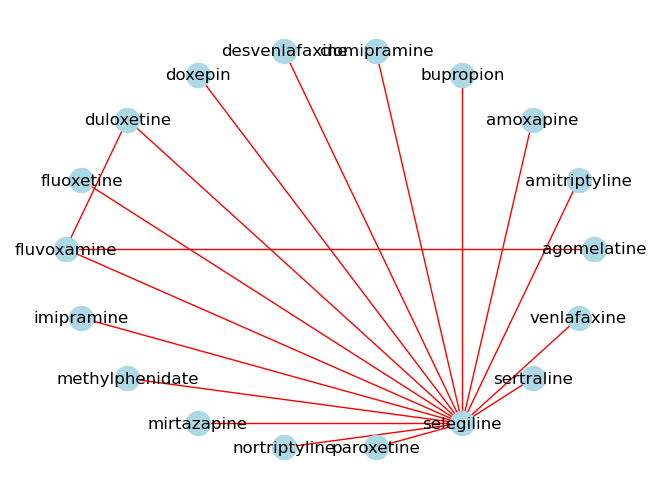

In [25]:
# circular layout
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='red')

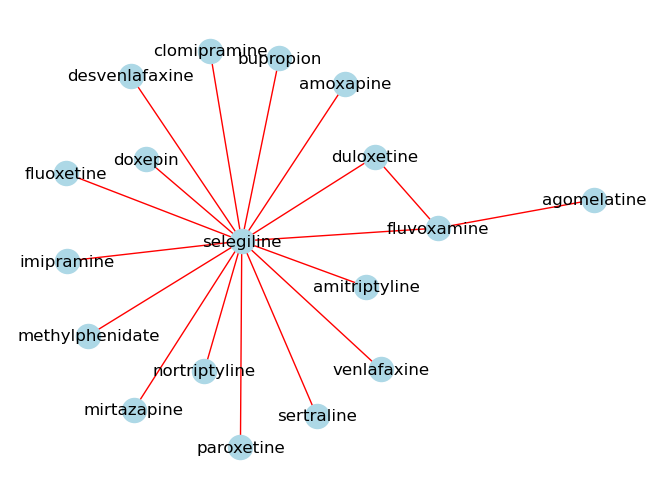

In [26]:
#kawai kamada layout
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='red')